# Logistic Regression

### "Restart and run all cells" in case of any problem during run time from kernel 

### Logistic regression intuition

1. ln(p/1-p) = b0 + b1 * x

If we projected a horizontal line and suppose we take this horizontal line at 0.5 at y line of graph. Than value under this horizontal line will not be taken and value upper than this horizontal line will be taken. y^ value y^ = 1 means chance of taking offer and y^ = 0 means no chance of taking offer.

### Kaggle dataset of social_network_ads

dataset link: https://www.kaggle.com/rakeshrau/social-network-ads

we want to find whether the buyer will buy the suv or not

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# instead of cross_validation i need to changed it to model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [6]:
df["Gender"].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [7]:
df["Age"].value_counts()

35    32
37    20
41    16
42    16
26    16
39    15
40    15
47    14
48    14
38    13
27    13
28    12
46    12
36    12
31    11
30    11
29    10
49    10
32     9
33     9
24     9
20     7
19     7
60     7
59     7
45     7
25     6
34     6
58     6
52     6
23     6
57     5
22     5
18     5
53     5
21     4
50     4
54     4
55     3
43     3
56     3
51     3
44     2
Name: Age, dtype: int64

In [8]:
df["EstimatedSalary"].value_counts()

72000     12
80000     11
79000     10
71000      9
75000      9
59000      8
74000      7
55000      7
88000      7
43000      7
60000      7
23000      7
61000      6
33000      6
50000      6
52000      6
65000      6
28000      6
82000      6
89000      6
57000      6
58000      5
20000      5
32000      5
22000      5
42000      5
86000      5
90000      5
47000      5
26000      4
          ..
131000     2
141000     2
19000      2
99000      1
105000     1
126000     1
147000     1
120000     1
93000      1
123000     1
48000      1
148000     1
106000     1
101000     1
91000      1
115000     1
139000     1
129000     1
97000      1
46000      1
119000     1
95000      1
116000     1
69000      1
102000     1
142000     1
100000     1
37000      1
114000     1
64000      1
Name: EstimatedSalary, Length: 117, dtype: int64

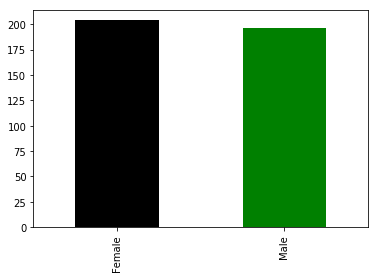

In [9]:
df["Gender"].value_counts().plot(kind="bar", color=["black", "green"]);

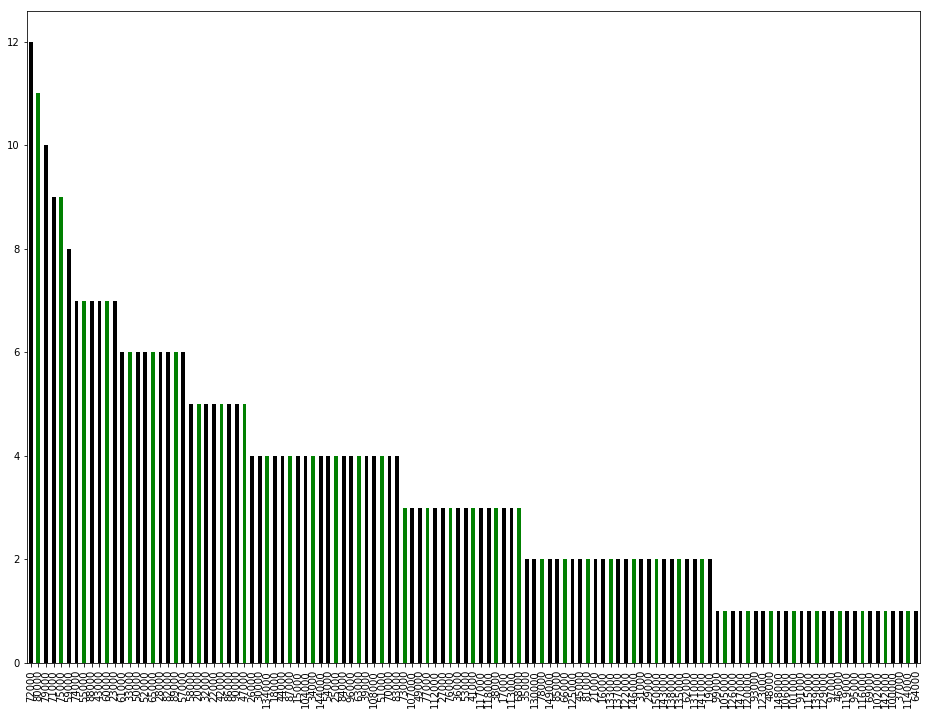

In [10]:
plt.figure(figsize=(16, 12))
df["EstimatedSalary"].value_counts().plot(kind="bar", color=["black", "green"]);

In [11]:
X = df.iloc[:, [2, 3]].values # selecting row for prediction
y = df.iloc[:, 4].values

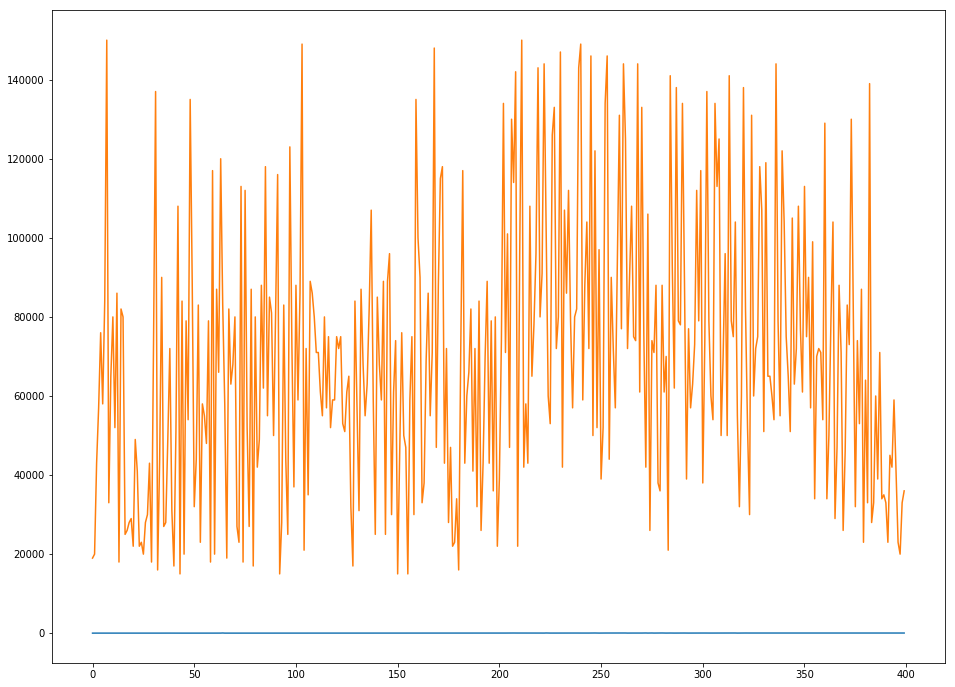

In [12]:
plt.figure(figsize=(16, 12))
plt.plot(X)

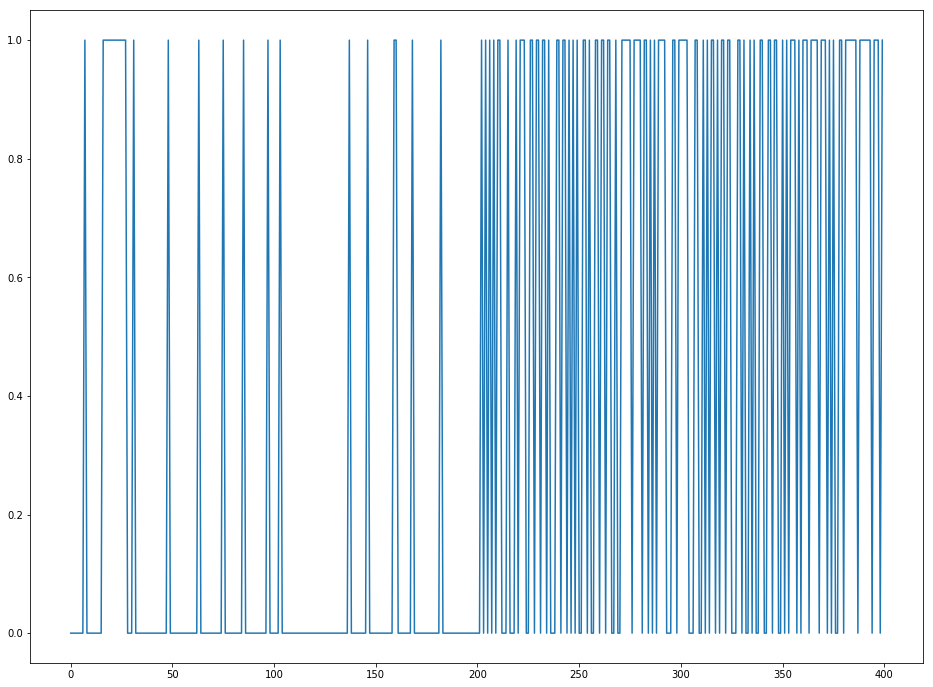

In [13]:
plt.figure(figsize=(16, 12))
plt.plot(y)

# Splitting the dataset into the training set and test set

In [14]:


# we also need to define test_size,,,becuase we have total 400 observation and out of that we will keep 300 for training and 100 for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
X_train

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],
       [    26,  15000],
       [    60, 102000],
       [    38, 112000],
       [    40, 107000],
       [    42,  53000],
       [    35,  59000],
       [    48,  41000],
       [    48, 134000],
       [    38, 113000],
       [    29, 148000],
       [    26,  15000],
       [    60,  42000],
       [    24,  19000],
       [    42, 149000],
       [    46,  96000],
       [    28,  59000],
       [    39,  96000],
       [    28,  89000],
       [    41,  72000],
       [    45,  26000],


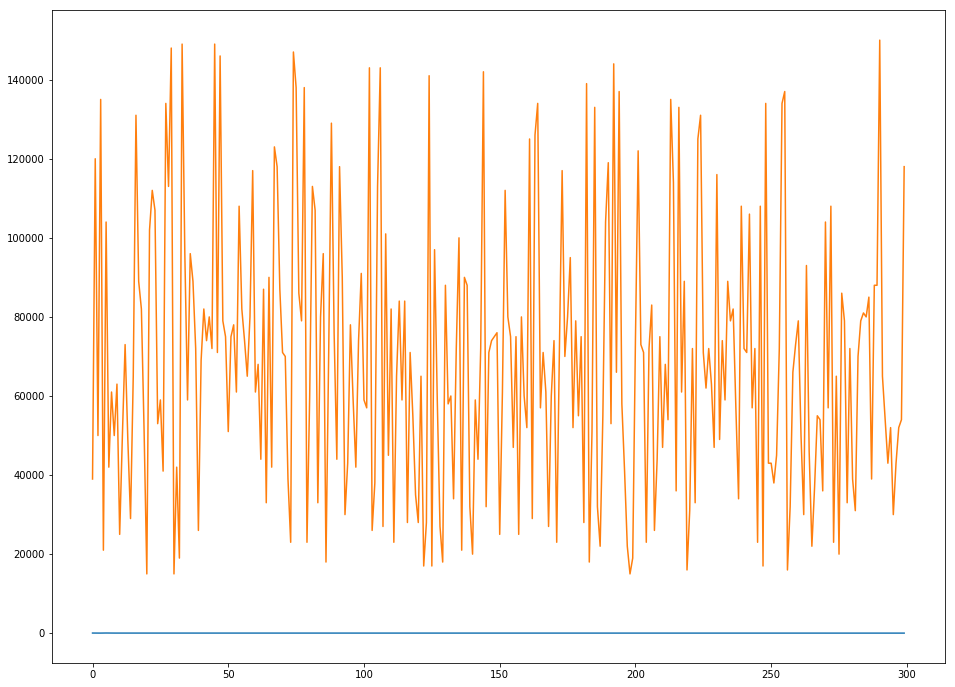

In [16]:
plt.figure(figsize=(16, 12))
plt.plot(X_train)

# Feature scaling

In [17]:
# feature scaling....yes we need feature scaling as it willl predict exactly between lots of data.

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fitting Logistic regression to the tarining set

In [18]:
# Fitting Logistic tegression to the tarining set

classifier1 = LogisticRegression(random_state=0)
classifier1.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Predicting the test set results

In [19]:
# Predicting the test set results

y_pred = classifier1.predict(X_test)

In [20]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

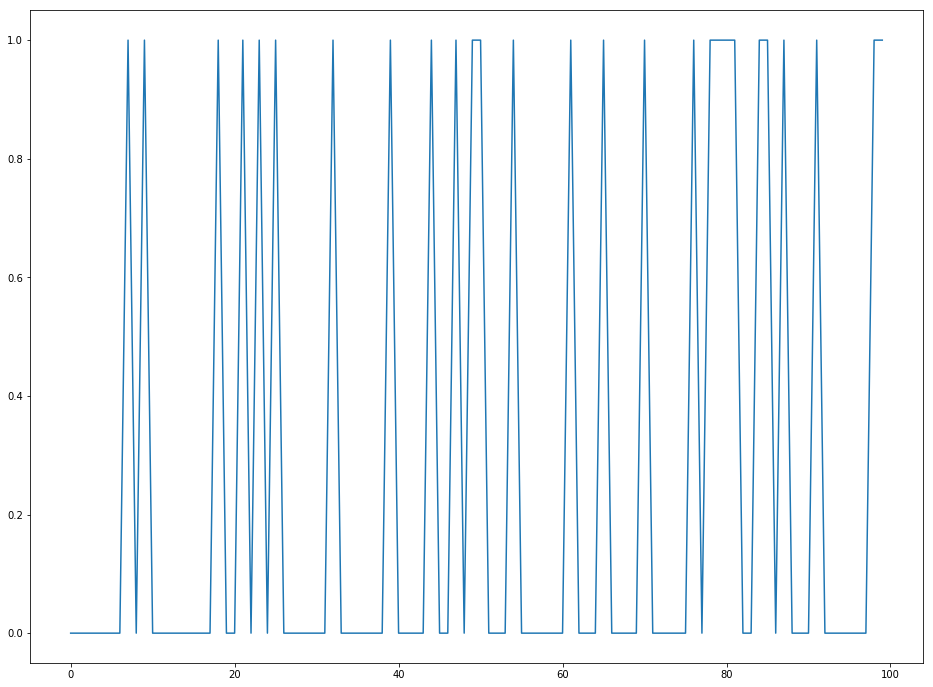

In [21]:
plt.figure(figsize=(16, 12))
plt.plot(y_pred)

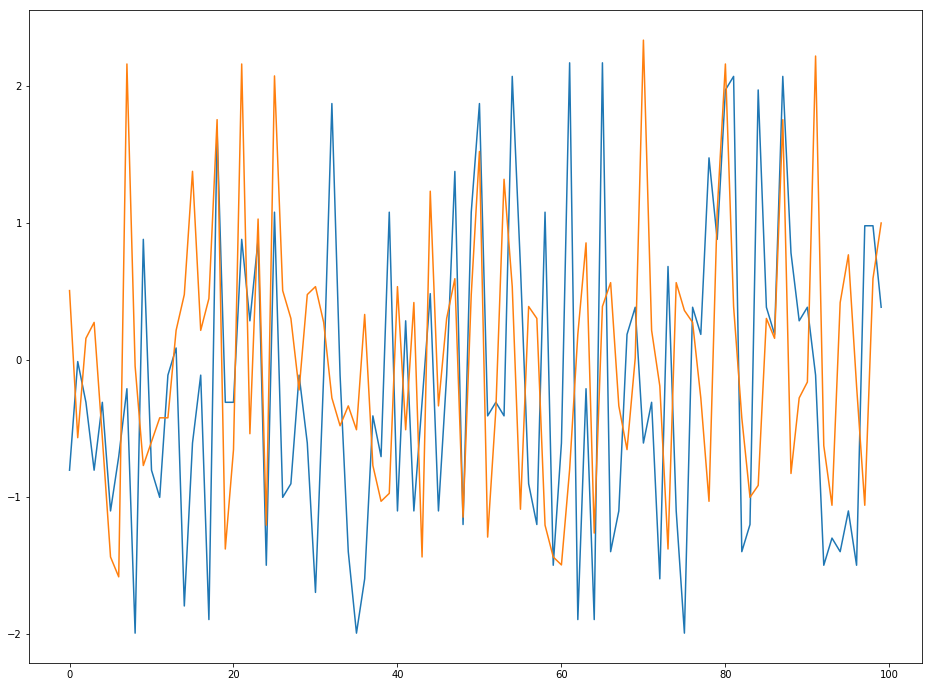

In [22]:
plt.figure(figsize=(16, 12))
plt.plot(X_test)

In [23]:
X_test

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

# Making the confusion matrix

In [24]:
# Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)

In [25]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

# Visualising the training set results

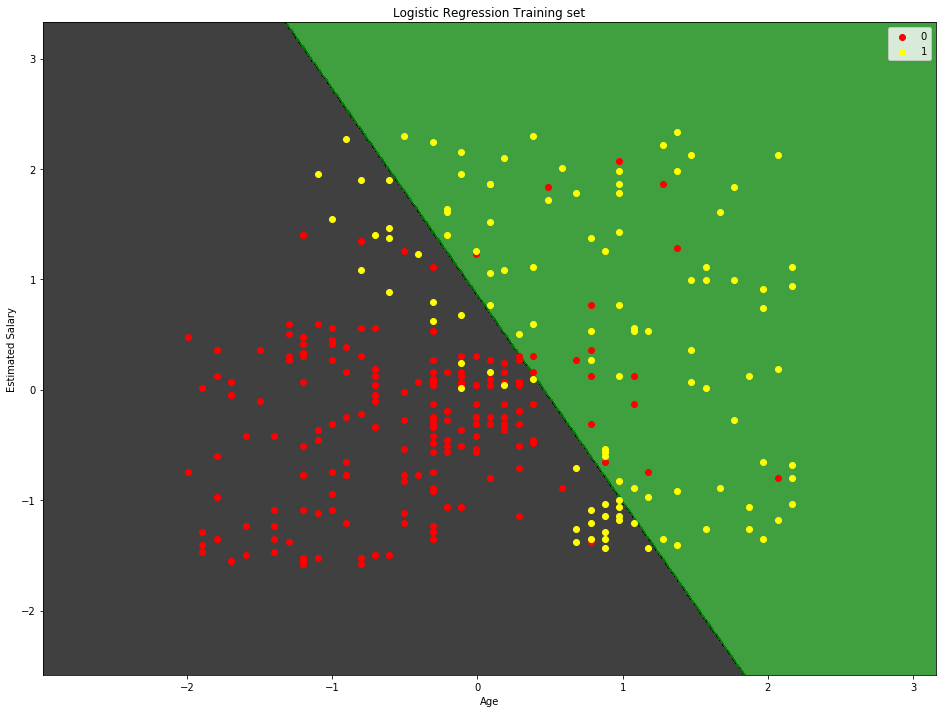

In [26]:
plt.figure(figsize=(16, 12))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(("black", "green")))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(("red", "yellow"))(i), label = j)


    
plt.title("Logistic Regression Training set")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

# Visualising the test set results

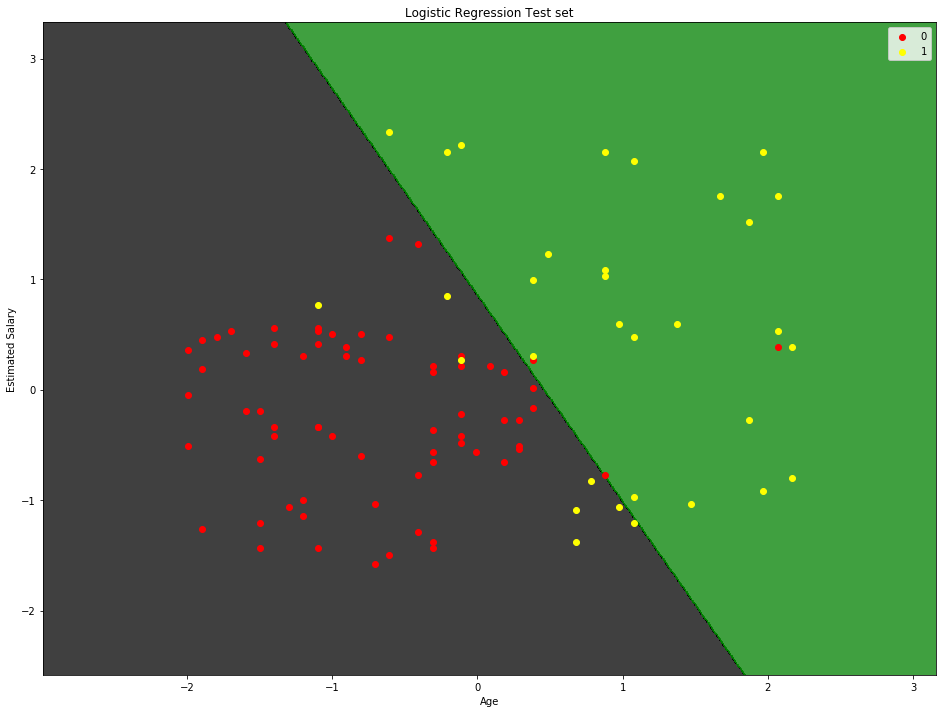

In [27]:
plt.figure(figsize=(16, 12))
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(("black", "green")))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(("red", "yellow"))(i), label = j)

plt.title("Logistic Regression Test set")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

# K-Nearest Neighbor (KNN)

# Euclidean distance

1. Euclidean distance between P1 and P2 = root((x2 - x1)^2 + (y2 - y1)^2

Basically KNN algorithm calculate the difference between one ponit and too another point.

# Fitting classifier to the training set for KNN

In [28]:
# First we will import KNN model from sklearn library.

from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier()

# Predicting the test set results for KNN

In [29]:
y_pred = classifier2.predict(X_test)

# Making the confusion matrix for KNN

In [30]:
# Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)

In [31]:
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

# Visualising the Training set results for KNN

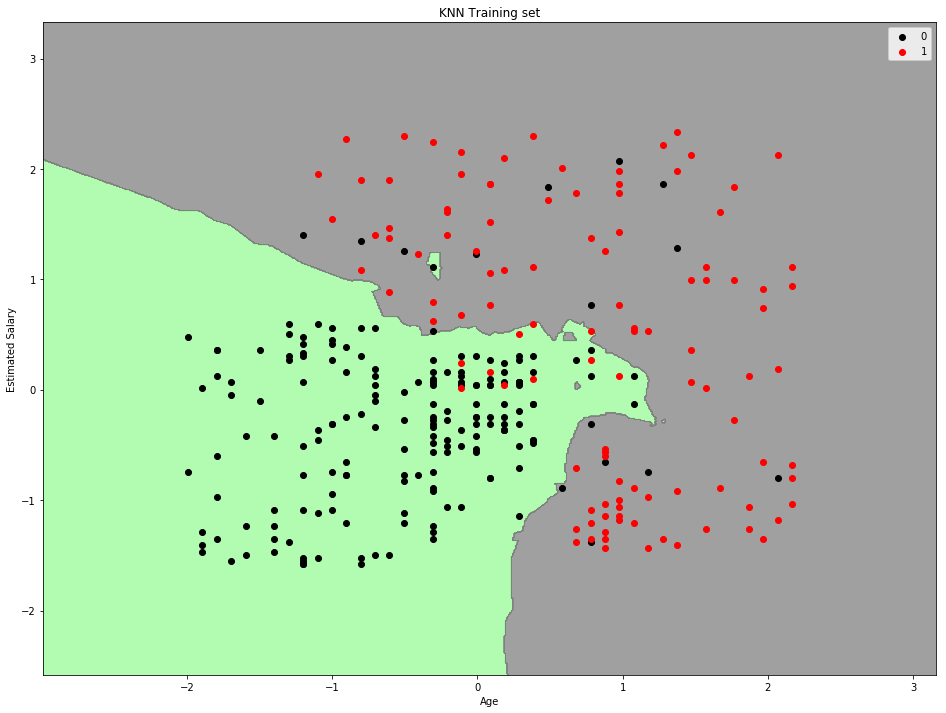

In [32]:
plt.figure(figsize=(16, 12))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(("palegreen", "grey")))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(("black", "red"))(i), label = j)


    
plt.title("KNN Training set")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

# Visualising the test set results for KNN

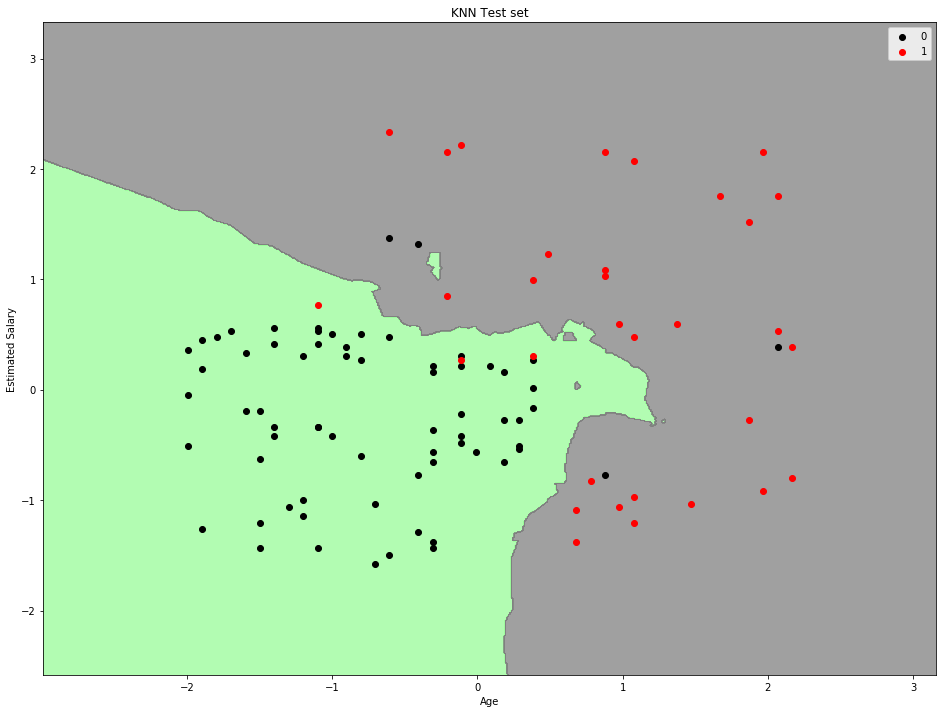

In [33]:
plt.figure(figsize=(16, 12))
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(("palegreen", "grey")))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(("black", "red"))(i), label = j)

plt.title("KNN Test set")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

# Support Vector Machine (SVM)

# We need to create a boundary 

1. Anything in right can be green and anyhing left can be red. we can draw any kind of line.
2. It is the finding the best line between different data point.
3. Newly draw line between two data points  will be maximum margin. Nearest point to the margin will be support vector 
4. Interesting fact about SVM is that, even if we remove other point except SV point, still our algorithm will work.
5. In 2D, maximum margin is a line but in reality it is a Maximum margin hyperplane (Maximum Margin Classifier).
6. Line near green points can be called as positive hyperplane and line near red points can be called as negative hyperplane.

# Fitting SVM to the Training set

1. import library
2. import the dataset
3. splitting the dataset into the training set and test set
4. feature scaling
5. fitting SVM to the training set

In [34]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = "linear", random_state = 0)
classifier3.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# Predicting the test set results

In [35]:
y_pred = classifier3.predict(X_test)

In [36]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [37]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

# Making the confusion matrix

In [38]:
# Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)

In [39]:
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

# Visualising the training set results for SVM

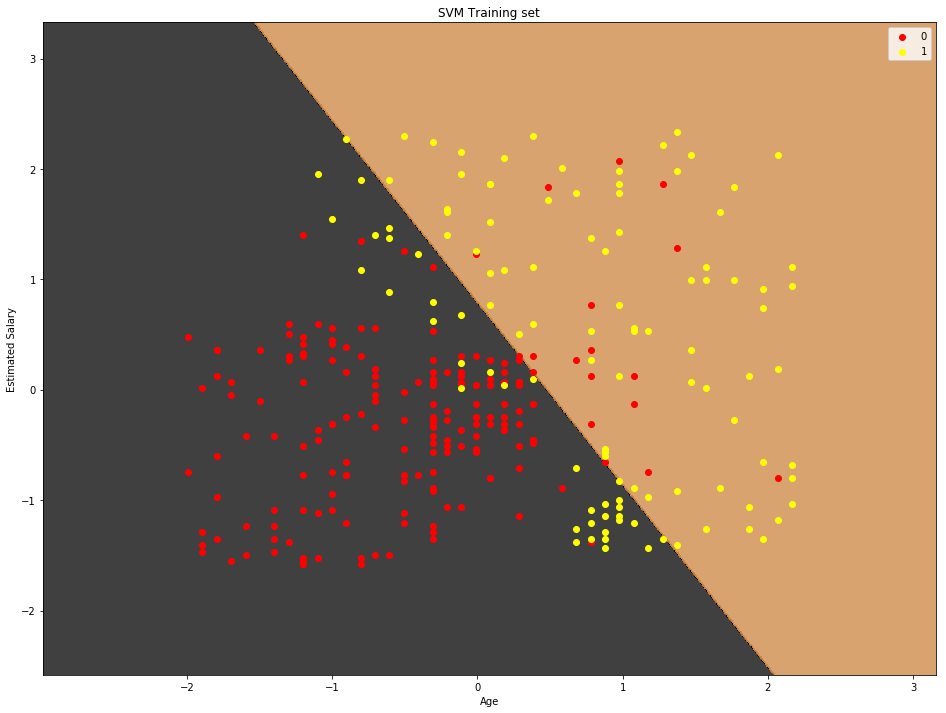

In [40]:
plt.figure(figsize=(16, 12))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(("black", "peru")))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(("red", "yellow"))(i), label = j)


    
plt.title("SVM Training set")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

# Visualising the Test set results for SVM

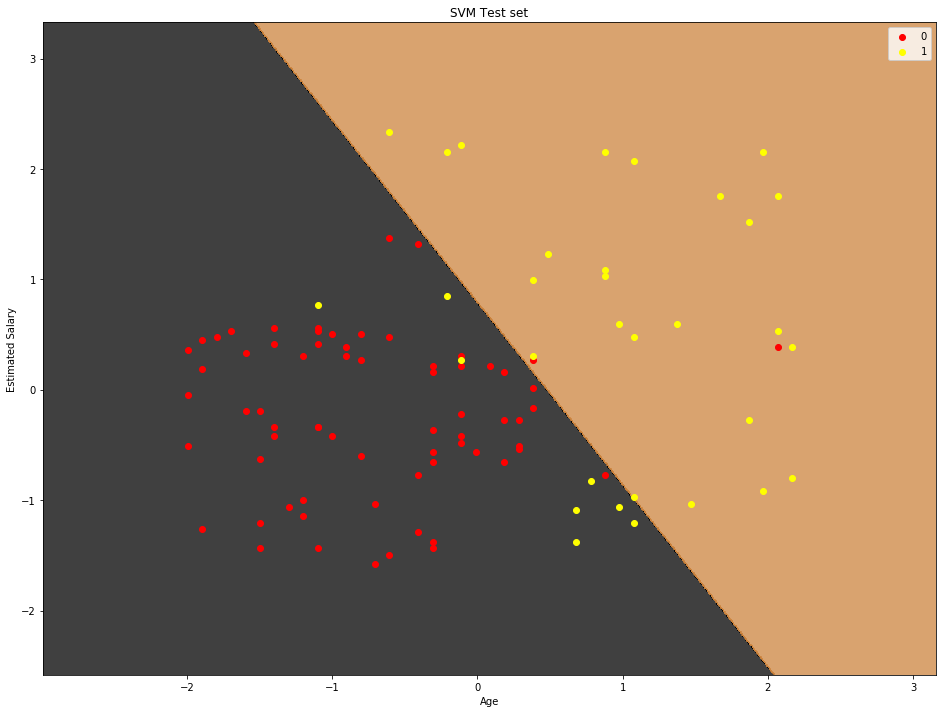

In [41]:
plt.figure(figsize=(16, 12))
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(("black", "peru")))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(("red", "yellow"))(i), label = j)

plt.title("SVM Test set")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

# Kernel SVM

1. But problem occur when we can draw a line between differnet data point, which make SVM vulnerable.
2. In this context we have the concept of Not Linearly Separable data points.

# A higher-Dimensional Space

1. f = x - 5, if we extract 5 from x then we get new dataset, where data point move there position further. (In 1D space).
2. f = (x - 5)^2, this math will project data point in curve 
3. Now as we have the curve and we separate the curve in linearly.
4. In 2D space linear separable line is straight line.

# Mapping to a higher dimension

1. phi(x1, x2) = (x1, x2, Z) [this is mapping function]
2. After mapping function implement we can linearly separate all 2D data space

# The gaussian RBF Kernel

1. we need to setup a landmark which will look for datapoint within 3D space
2. If we increase sigma then kernel space will decrease.
3. y setting up sigma value we can find which datapoint are needed. which is decision boundary.
4. if we add two kernel, then we can solve more critical problem.
5. this is call kernel trick

# Types of kernel Functions

1. Gaussian RBF Kernel
2. Sigmoid Kernel
3. Polynomial Kernel

website link for different kernel functions:

link: https://www.juliaobserver.com/packages/MLKernels

# Fitting Kernel-SVM to the Training set

1. import library
2. import the dataset
3. splitting the dataset into the training set and test set
4. feature scaling
5. fitting Kernel-SVM to the training set

In [42]:
from sklearn.svm import SVC
classifier4 = SVC(kernel = "rbf", random_state = 0)
classifier4.fit(X_train, y_train)

SVC(random_state=0)

# Predicting the test set results

In [43]:
# Predicting the Test set results
y_pred = classifier4.predict(X_test)

In [44]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [45]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

# Making the confusion matrix

In [46]:
# Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)

In [47]:
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

# Visualising the Training set with Kernel-SVM

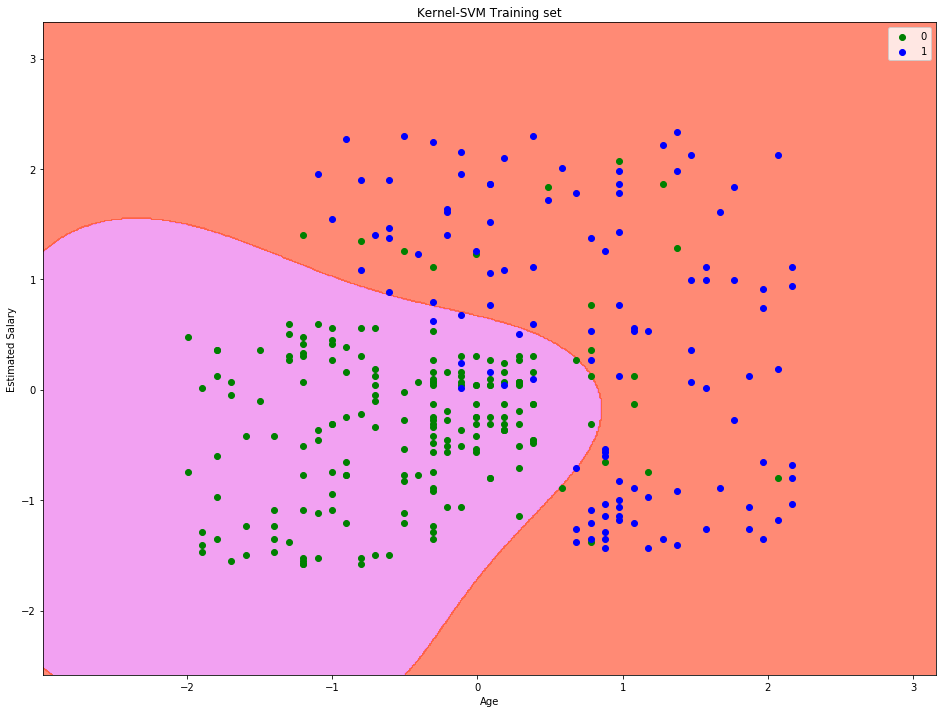

In [48]:
plt.figure(figsize=(16, 12))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(("violet", "tomato")))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(("green", "blue"))(i), label = j)


    
plt.title("Kernel-SVM Training set")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

# Visualising the Test set with Kernel-SVM

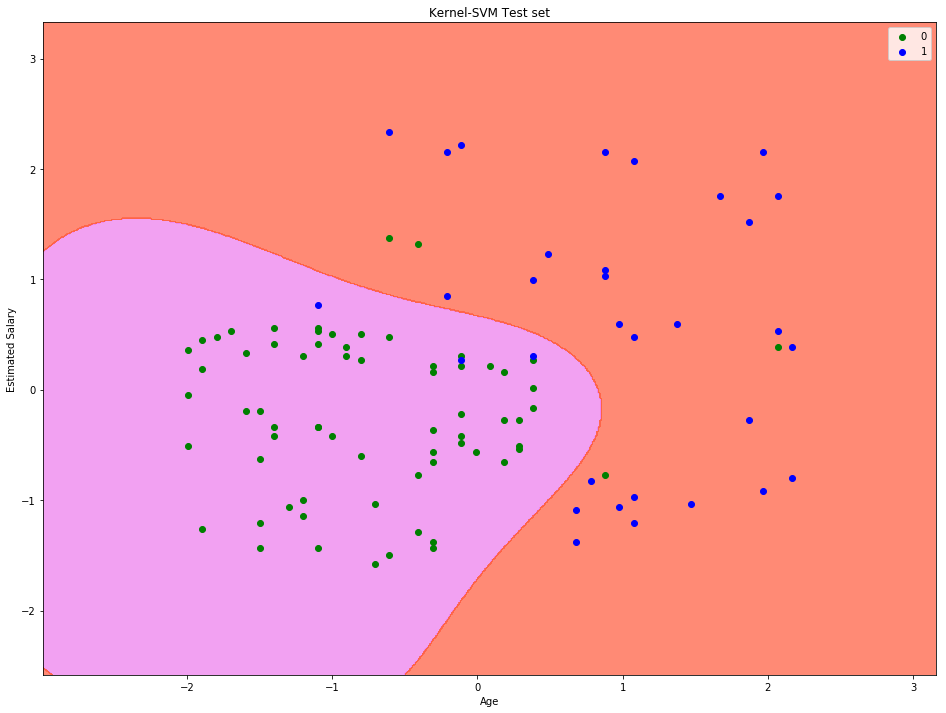

In [49]:
plt.figure(figsize=(16, 12))
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(("violet", "tomato")))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(("green", "blue"))(i), label = j)

plt.title("Kernel-SVM Test set")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

# Accuracy for 4 algorithm

### Logistic regression give less competetive result then other algorithm

In [50]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "SVM": SVC(),
          "Kernel-SVM": SVC()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [51]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.89, 'KNN': 0.93, 'SVM': 0.93, 'Kernel-SVM': 0.93}

# Model Comparison

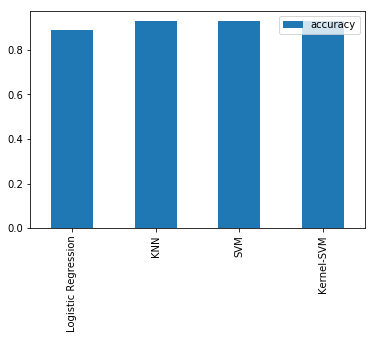

In [52]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

# K-fold cross validation

[[64  4]
 [ 3 29]]
Accuracy: 90.33 %
Standard Deviation: 6.57 %


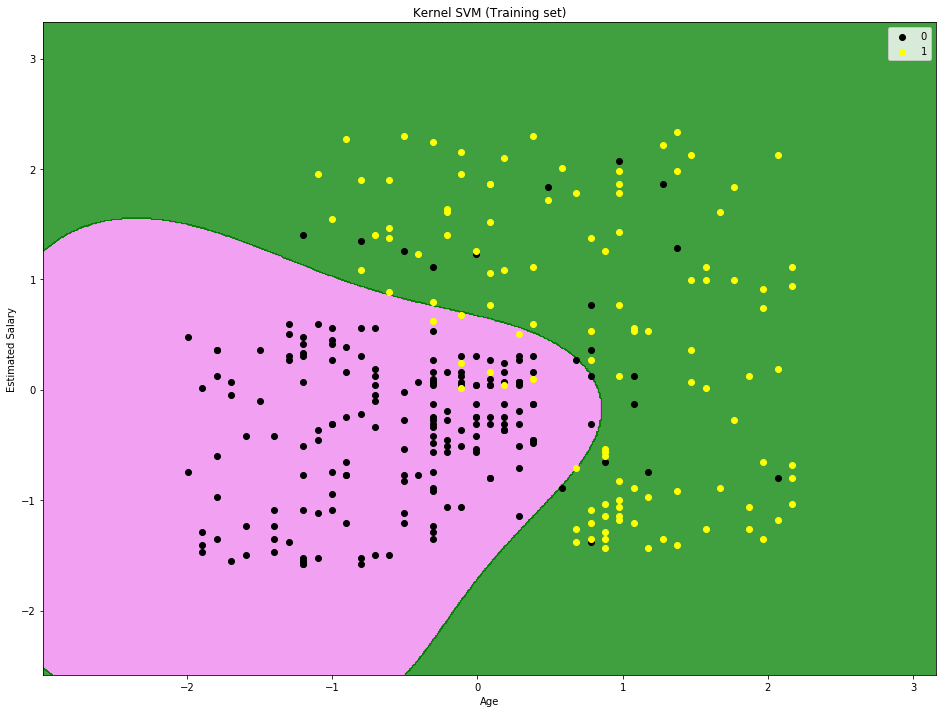

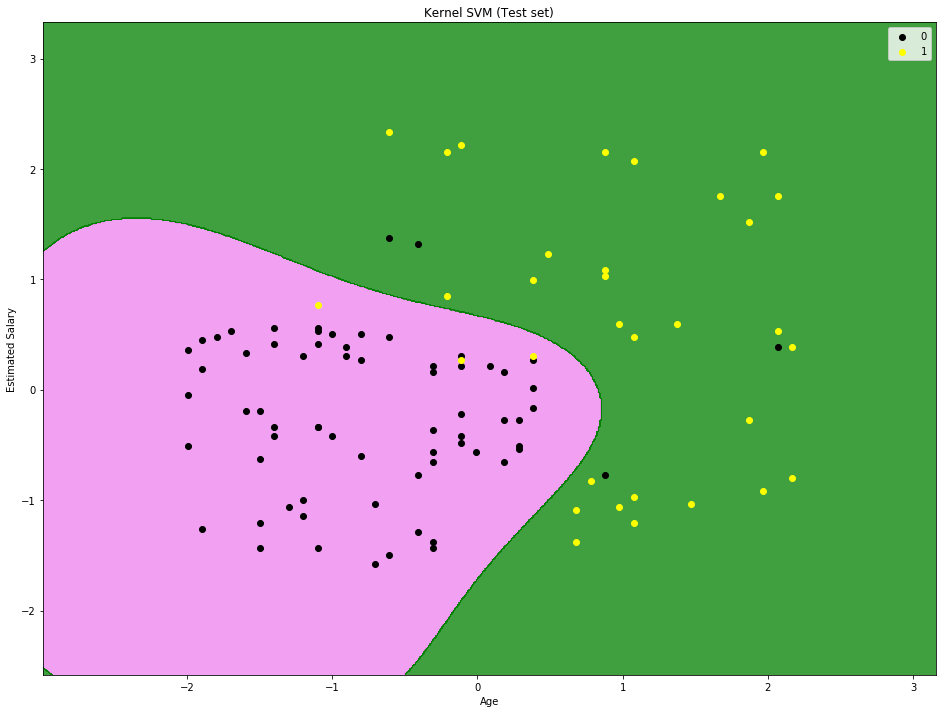

In [53]:
'''
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

'''

# k-Fold Cross Validation

plt.figure(figsize=(16, 12))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier4, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('violet', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'yellow'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


plt.figure(figsize=(16, 12))

# Visualising the Test set results


from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('violet', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'yellow'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Grid Search

[[64  4]
 [ 3 29]]
Accuracy: 90.33 %
Standard Deviation: 6.57 %
Best Accuracy: 90.67 %
Best Parameters: {'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


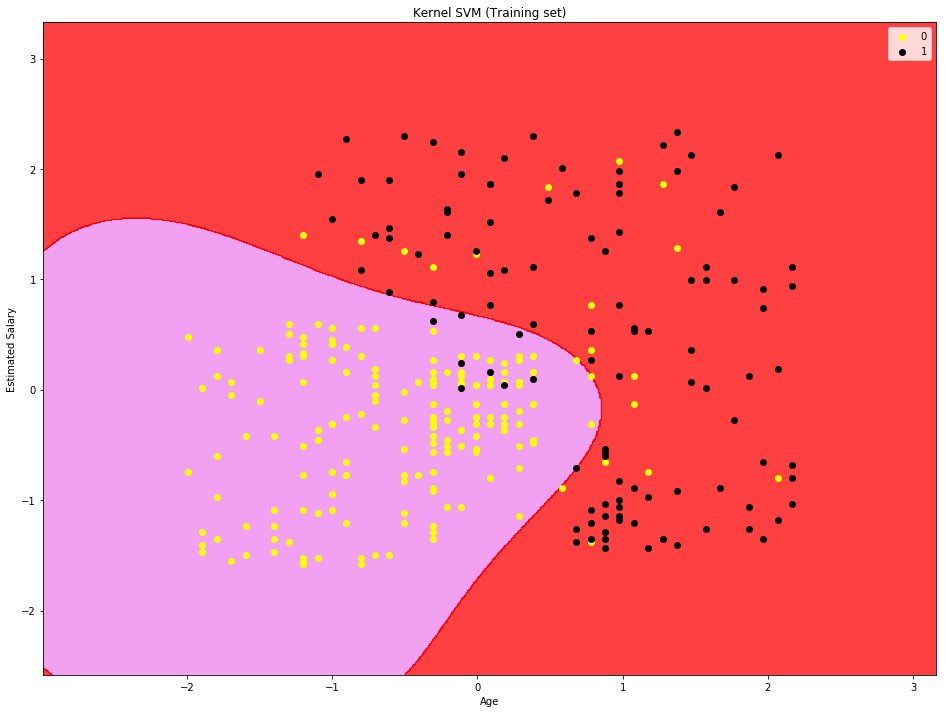

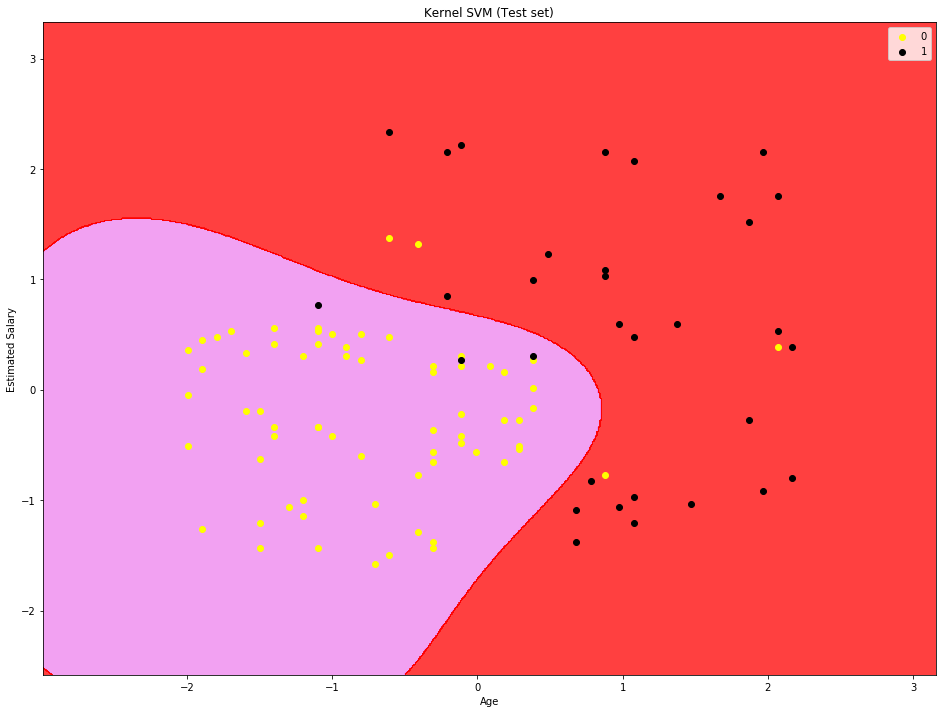

In [54]:
'''
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

'''
# Grid Search
plt.figure(figsize=(16, 12))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

'''


'''
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier4, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier4,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('violet', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('yellow', 'black'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
plt.figure(figsize=(16, 12))

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('violet', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('yellow', 'black'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Algorithm is the most important things to understand, As it give us actual insight of what we are doing